***Системи Data Science. Лабораторна робота №1.***

Назва: Прогнозування вартості авокадо

Виконала: Лісіченко Марина, група КМ-83.

**1.1. Розуміння бізнесу - розуміння даних**

**1.1.1. Область дослідження**

Наразі більшість людей хочуть правильно харчуватись. Одним з очевидних корисних фруктів є авокадо. Зараз цей фрукт є достатньо дорогим та яка ціна буде в майбутньому? 

Було вирішено дослідити ринок авокадо на ринку США. Мета дослідження полягає у встановлення сучасних ринкових тенденцій впливу різних характеристик на ціну авокадо та знаходження залежностей між цими характеристиками. Основна задача - це розробка системи, що буде прогнозувати ціну цього несмачного, але корисного фрукту.

**1.1.2. Збір даних з інтернет-ресурсів**

Потрібний dataset для дослідження був обраний на ресурсу Kaggle. Дані були взяти з платформи HAB. https://hassavocadoboard.com/inside-hab/

HAB забезпечує промисловість консолідованими даними про постачання та ринки, проводить дослідження харчування, навчає медичних працівників та об’єднує людей з усіх куточків галузі для спільної роботи у напрямку зростання, що приносить користь усім. Організація також збирає та перерозподіляє кошти в Каліфорнію та асоціації імпортерів на користь певних країн походження при просуванні своїх брендів авокадо серед споживачів та споживачів по всій території Сполучених Штатів.

Цей документ створений завдяки функції "Create notebook". 


Визначимо, які файли доступні для користування:


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Будемо працювати з файлом : /kaggle/input/avocado-prices/avocado.csv 

Імпортуємо всі необхідні бібліотеки:

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from mxnet import autograd, gluon, np, npx
from mxnet import init
from mxnet.gluon import nn
import mxnet as mx
import mxnet as d2l
from IPython.display import clear_output



import numpy as np
import seaborn as sns 
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pandas_profiling as pp


npx.set_np()

**1.1.3. Збереження даних в структурі pandas**


In [ ]:
path = '../input/avocado-prices/avocado.csv'
df = pd.read_csv(path)
df.set_index('Date', inplace=True)
df.sort_values(by='Date', inplace=True)
df.head()

**1.1.4 Виведемо дані**

Для цього скористаємось функцією info()


In [ ]:
df.info()

Date - дата спостереження

AveragePrice - середня ціна одного авокадо

type - тип звичайний або органічний

year - рік

Region - місто або регіон спостереження

Total Volume - загальна кількість проданих авокад

4046 - Загальна кількість авокадо з проданим PL46 4046

4225 - Загальна кількість авокадо з проданими 4225 PLU

4770 - Загальна кількість проданих авокадо з 4770 PLU

**1.2.1 Підготовка даних.**

Перевірка на дублікати та пустих значень null.

In [ ]:
df.isnull().any()

In [ ]:
df.duplicated().any()

Немає дублікатів та null знаечнь

**1.2.2 Розвідувальний аналіз даних**

Виведемо матрицю кореляції. Подивимось як скорельовані відносно один одного дані.

In [ ]:
corr = df.corr()
corr
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title('Матриця кореляції', fontsize=16)
sns.heatmap(corr, vmin=-1, vmax=1, cmap='viridis', annot=True)

Давайте виведемо розподіл ціни в цілому по всім типам авокадо:

In [ ]:
average_prices = np.array(df['AveragePrice'].values)
X = np.arange(len(average_prices)).astype(np.float32)
y = average_prices.astype(np.float32)
y /= y.max()
plt.figure(figsize=(11,8))
plt.plot(X[:50], y[:50], 'b-')

А тепер давайте подивимось на ціну кожного типу окремо:

In [ ]:
import plotly.express as px
#conventional = df[df['type'] == 'conventional']
#organic = df[df['type'] == 'organic']

fig = px.histogram(df, x='AveragePrice', color='type',
                   marginal='box', # or violin, rug
                   hover_data=df.columns)


fig.show()

Отже, в середньому органічний авокадо дорожчий (як і очікувалося).

Давайте також перевіримо, чи впливає географія на ціну.

In [ ]:
fig = px.box(df, x='region', y='AveragePrice')
fig.show()

**1.2.3 Розбиття набору даних на тренувальний, валідаційний**

In [ ]:
n_train = 50
n_test = 50

x_train = X[:n_train]

# Training outputs
y_train = y[:n_train]

# Testing examples
x_test = np.arange(0, 50, 1)
y_truth = y[x_test]

**1.2.6 Бізнес-профіль Еріксона-Пенкера**

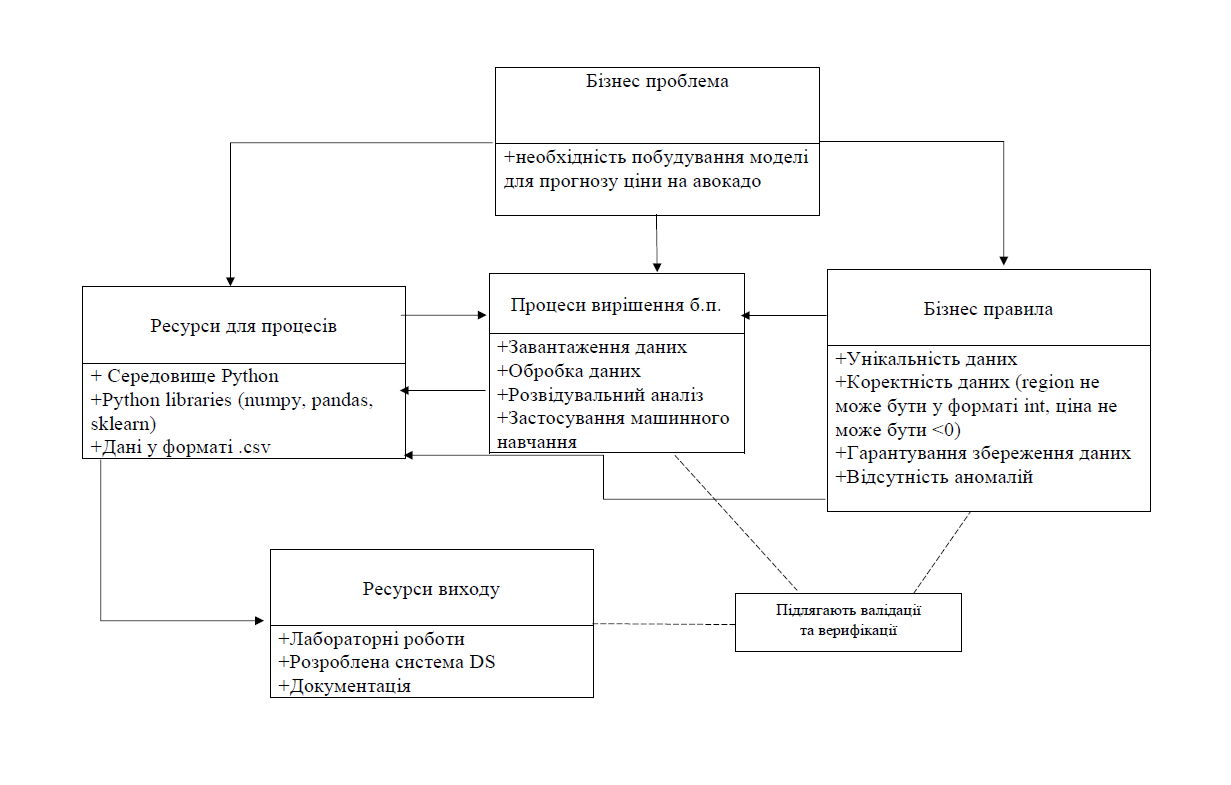


**1.3 Верифікація та валідація результатів**

**Верифікація**

В ході першої лабораторної роботи було виконана підготовка даних для вирішення задачі прогнозування цін на авокадо. Треба було:

* поставити задачу, 
* визначити предметну область,
* дослідити дані


Предметна область: харчовий ринок США (підрозділ : фрукти).

Основна задача: підготовка даних до побудови системи прогнозування цін на авокадо в залежності від регіону, типу та ін властивостей авокадо, які ми змогли отримати з датасету.

Завантажили та зберегли дані у Dataframe. Проаналізували структуру таблиці та обчислили основні статестичні характеристики даних в таблиці.

Також ретельно підготували дані до аналізую А саме, перевірили датасет на наявність аномалій, дублікатів та некоректних значень.

Проведели розвідувальний аналіз даних з виведенням відповідних графіків

Ще розділили дані на тестові та тренувальні у співвідношенні 50 на 50. 

Також були задокументовані класи бізнес-профілю Еріксона-Пенкера.

Верифікація пройдена успішно, бо умови лабораторної роботи були виконані.


**Валідація**

Проаналізувавши повністю датасет, приходимо до висновку, що дані є коректними. Результати, що ми отримали мають зв'зок з реальним світом: вони логічні та справедливі. Наприклад, органічні авокадо вийшли дорожчими, аніж convencional. Тому що для convencional використувають різні пестициди тощо.

Головною ціллю дослідження є розробка моделі, що буде передбачувати ринкову ціну авокадо за його характеристиками. Тобто треба буде змоделювати модель, що буде досліджувати великі маркетингові класи даних.



**1.4 Висновки**

В першій лабораторній роботі була проведена підготовка даних для вирішення задачі прогнозування цін на авокадо для ринку США. Було використано такі ресурси для процесів: kaggle Notebook, в якому було середовище Python, що дало змогу написати код; імпортування всіх необхідних бібліотек (numpy, pandas, sklearn, matplotlib, seaborn).

Основні відомості про задачу:

Предметна область: харчовий ринок США (підрозділ: фрукти).
Основна задача: підготовка даних до побудови системи прогнозування цін на авокадо в залежності від регіону, типу та ін властивостей авокадо, які ми змогли отримати з датасету.

Було пройдено основні етапи створення систем DS:

* Збір необхідних даних
* Обробка даних
* Видалення не потрібних для аналізу даних
* Перевірка на аномальність
* Аналіз даних
* Розбиття на тренувальну та тестувальну області
* Верифікація
* Валідація результатів

При аналізу даних корстувались такими бізнес-правилами:
* Унікальність даних
* Коректність даних
* Відсутність аномалій


Дані завантажили та зберегли в Dataframe.

Побудували матрицю кореляцій,в якій роздивились залежності між даними в таблиці.

Також побудували та проаналізували графіки цін усіх типів авокадо та кожного типу окрему. Виявилось, що органічні авокадо дорожчі, але по наявності звичайних (які з хімікатами) більше, а вони і дешевші.

Дані підготовлені до наступного етапу розробки системи - застосування алгоритмів Machine Learning для прогнозування ціни на авокадо.

